In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('G:/Time_Series_Data')

import numpy as np
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dense, Embedding,Input,LSTM,GlobalMaxPooling1D
from keras import Model
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

In [208]:
temp_data_set = {}
temp_dev=[]
year=[]
with open(os.path.join('graph.txt'),encoding="utf-8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for i,line in enumerate(f):
        print(line)
        print('------')
        if len(line)==25:
            values = line.split()
            year.append(values[0])
            temp_dev.append(float(values[2]))
            
            
Data_set=pd.DataFrame({'Year':year,'Temperature Increase (C)':temp_dev})
Data_set['Year']=pd.to_datetime(Data_set.Year,format='%Y')

Land-Ocean Temperature Index (C)

------
--------------------------------

------


------
Year No_Smoothing  Lowess(5)

------
----------------------------

------
1880     -0.16     -0.09

------
1881     -0.08     -0.12

------
1882     -0.10     -0.16

------
1883     -0.17     -0.20

------
1884     -0.28     -0.23

------
1885     -0.33     -0.26

------
1886     -0.31     -0.27

------
1887     -0.36     -0.27

------
1888     -0.17     -0.26

------
1889     -0.10     -0.25

------
1890     -0.35     -0.25

------
1891     -0.22     -0.26

------
1892     -0.27     -0.26

------
1893     -0.31     -0.26

------
1894     -0.31     -0.24

------
1895     -0.23     -0.22

------
1896     -0.11     -0.21

------
1897     -0.10     -0.18

------
1898     -0.27     -0.17

------
1899     -0.18     -0.17

------
1900     -0.08     -0.20

------
1901     -0.16     -0.23

------
1902     -0.27     -0.26

------
1903     -0.36     -0.28

------
1904     -0.46     -0.30

------
1905     -

In [209]:
#Data_set_emission
Data_set2=pd.read_csv('annual-co2-emissions-per-country.csv')
Data_set_emission_world=Data_set2[Data_set2['Entity']=='World'].loc[:,['Year','Annual CO2 emissions']]

Data_set_emission_world
Data_set_emission_world.Year=pd.to_datetime(Data_set_emission_world.Year,format='%Y')

In [210]:
Data_all=pd.merge(Data_set,Data_set_emission_world,on='Year')


# Plotting temperature increase and co2 emmision by year

[Text(0, 0.0, '0'),
 Text(0, 10000000000.0, '1'),
 Text(0, 20000000000.0, '2'),
 Text(0, 30000000000.0, '3'),
 Text(0, 40000000000.0, '4')]

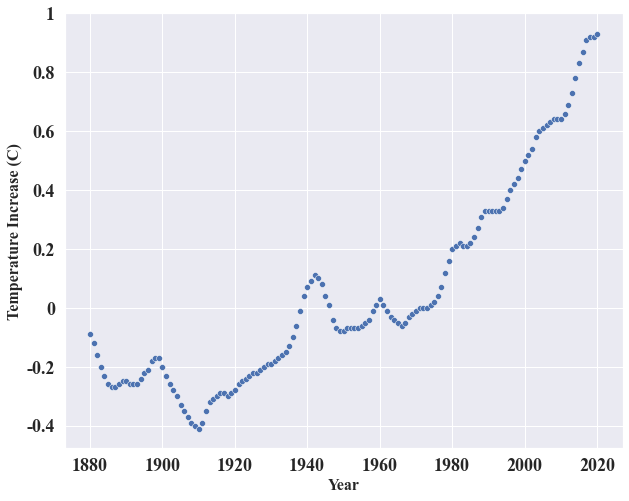

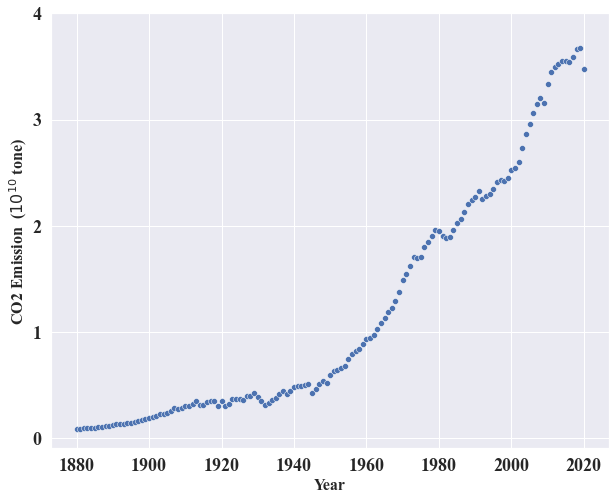

In [211]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Year',y='Temperature Increase (C)',data=Data_all)
ax.set_xlabel('Year',fontsize=16,fontweight='bold',family='Times New Roman')
ax.set_ylabel('Temperature Increase (C)',fontsize=16,fontweight='bold',family='Times New Roman')
date_x=pd.DataFrame({'dates_axis':['1880','1900','1920','1940','1960','1980','2000','2020']})
ax.set_xticks(pd.to_datetime(date_x['dates_axis']))
ax.set_xticklabels(['1880','1900','1920','1940','1960','1980','2000','2020'],fontsize=18,fontweight='bold',family='Times New Roman')
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],fontsize=18,fontweight='bold',family='Times New Roman')

fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Year',y='Annual CO2 emissions',data=Data_all)
ax.set_xlabel('Year',fontsize=16,fontweight='bold',family='Times New Roman')
ax.set_ylabel(r'CO2 Emission  ($10^{10}$ tone)',fontsize=16,fontweight='bold',family='Times New Roman')
date_x=pd.DataFrame({'dates_axis':['1880','1900','1920','1940','1960','1980','2000','2020']})
ax.set_xticks(pd.to_datetime(date_x['dates_axis']))
ax.set_xticklabels(['1880','1900','1920','1940','1960','1980','2000','2020'],fontsize=18,fontweight='bold',family='Times New Roman')
ax.set_yticks([0,1e10,2e10,3e10,4e10])
ax.set_yticklabels([0,1,2,3,4],fontsize=18,fontweight='bold',family='Times New Roman')


In [212]:
# Creating sequences of data to be used for RNN
min_max=MinMaxScaler()
min_max_em=MinMaxScaler()
train=Data_all.iloc[:130,:]
test=Data_all.iloc[130:,:]
temp=train['Temperature Increase (C)'].values
train_T_scaled=min_max.fit_transform(temp.reshape((-1,1)))
emis_=train['Annual CO2 emissions'].values
train__scaled=min_max_em.fit_transform(emis_.reshape((-1,1)))
X=np.concatenate((train_T_scaled, train__scaled), axis=1, out=None, dtype=None, casting="same_kind")


In [295]:
#code for return sequence case
n_input=30
n_features=2
generator=TimeseriesGenerator(X,train_T_scaled,length=n_input,batch_size=1)

input_=Input(shape=(n_input,2))
x=LSTM(30,activation='relu')(input_)
output=Dense(1)(x)
model=Model(input_,output)
model.compile(loss="mean_squared_error")
history=model.fit_generator(generator,epochs=40)


Epoch 1/40


<ipython-input-295-97e7a6bfc094>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator,epochs=40)


100/100 [==============================] - 2s 9ms/step - loss: 0.0708
Epoch 2/40
100/100 [==============================] - 1s 10ms/step - loss: 0.0046
Epoch 3/40
100/100 [==============================] - 1s 10ms/step - loss: 0.0036
Epoch 4/40
100/100 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 5/40
100/100 [==============================] - 1s 10ms/step - loss: 0.0025
Epoch 6/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 7/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 8/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 9/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 10/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 11/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 12/40
100/100 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 13/40
100/100 [===========

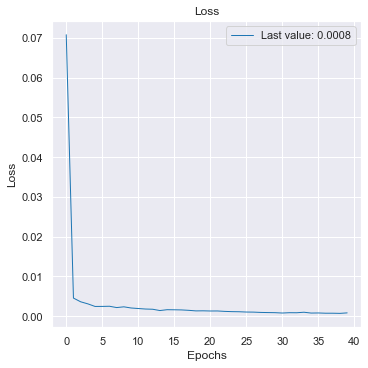

In [296]:


show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [297]:
model.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 30, 2)]           0         
                                                                 
 lstm_50 (LSTM)              (None, 30)                3960      
                                                                 
 dense_50 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,991
Trainable params: 3,991
Non-trainable params: 0
_________________________________________________________________


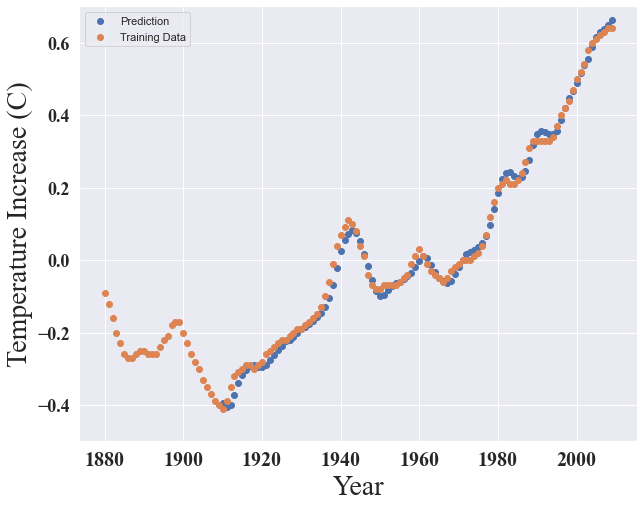

In [298]:
# training data predictions
y_prediction=np.zeros((len(train['Temperature Increase (C)'].values),))
k=0
for i in range(len(train['Temperature Increase (C)'].values)-n_input):
    y_prediction[k]=model.predict(generator[i][0])
    k+=1
y_pre_unscaled=min_max.inverse_transform(y_prediction.reshape(-1,1))
plt.figure(figsize=(10,8))
plt.scatter(train['Year'].iloc[n_input:],y_pre_unscaled[:-n_input],label='Prediction')
plt.scatter(train['Year'],temp[:].reshape((-1,1)),label='Training Data')
plt.ylim([-0.5,0.7])
yearly_data=pd.DataFrame({'Year':[1880,1900,1920,1940,1960,1980,2000]})
xticks_data=pd.to_datetime(yearly_data['Year'].values,format='%Y')

plt.yticks([-0.4,-0.2,0,0.2,0.4,0.6],fontweight='bold',fontsize=18,family='Times New Roman')
plt.xticks(fontsize=20,rotation=0,family='Times New Roman',fontweight='bold')
plt.xlabel('Year',fontsize=28,family='Times New Roman')
plt.ylabel('Temperature Increase (C)',fontsize=28,family='Times New Roman')

plt.legend(loc='upper left')


In [299]:
temp_test=test['Temperature Increase (C)'].values
test_T_scaled=min_max.transform(temp_test.reshape((-1,1)))
emis_test=test['Annual CO2 emissions'].values
test_scaled=min_max_em.transform(emis_test.reshape((-1,1)))
X_test=np.concatenate((test_T_scaled, test_scaled), axis=1, out=None, dtype=None, casting="same_kind")
n_features=2
first_eval_batch=X[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
y_test_predict=[]
for i in range(X_test.shape[0]):
    y_now=model.predict(current_batch)
    y_test_predict.append(y_now[0,0])
    new_row=np.array([[y_now[0,0],test_scaled[i,0]]])
    first_eval_batch=np.concatenate((first_eval_batch[1:],new_row),axis=0)
    current_batch=first_eval_batch.reshape((1,n_input,n_features))
    print(y_now)
y_test_predict=np.array(y_test_predict)
test['predictions']=min_max.inverse_transform(y_test_predict.reshape((-1,1)))
from sklearn.metrics import mean_squared_error
print('Percentage of Error for the test dataset')
print(mean_squared_error(test['Temperature Increase (C)'],test['predictions'].values)/np.mean(np.abs(temp))*100)


[[1.022604]]
[[1.0478244]]
[[1.0812966]]
[[1.1185433]]
[[1.1589594]]
[[1.2019894]]
[[1.2456636]]
[[1.2892094]]
[[1.3339326]]
[[1.3792495]]
[[1.420827]]
Percentage of Error for the test dataset
2.0549100863319105


<ipython-input-299-b548abe93401>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=min_max.inverse_transform(y_test_predict.reshape((-1,1)))


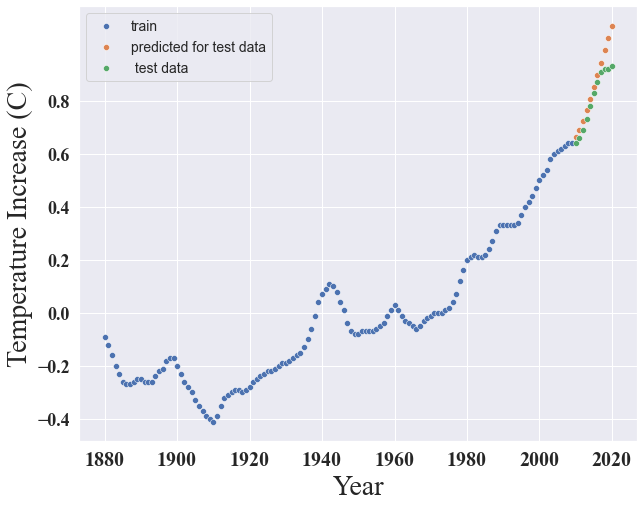

In [300]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(10,8))

sns.scatterplot(y='Temperature Increase (C)',x='Year',data=train.iloc[:,:],label='train')
sns.scatterplot(y='predictions',x='Year',data=test.iloc[:,:],label='predicted for test data')
sns.scatterplot(y='Temperature Increase (C)',x='Year',data=test.iloc[:,:],label=' test data')
plt.yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8],fontweight='bold',fontsize=18,family='Times New Roman')
plt.xticks(fontsize=20,rotation=0,family='Times New Roman',fontweight='bold')
plt.xlabel('Year',fontsize=28,family='Times New Roman')
plt.ylabel('Temperature Increase (C)',fontsize=28,family='Times New Roman')

plt.legend(loc='upper left',fontsize=14)

